# Итоговое задание №4

Используя полученные в этом блоке знания вам необходимо написать программу, которая будет анализировать данные о продажах продуктов в магазине и строить графики наглядного представления информации.

В ходе создания программы вам необходимо реализовать следующие функции:

- ```read_sales_data(file_path)```, которая принимает путь к файлу и возвращает список продаж. Продажи в свою очередь являются словарями с ключами product_name, quantity, price, date (название, количество, цена, дата).
- ```total_sales_per_product(sales_data)```, которая принимает список продаж и возвращает словарь, где ключ - название продукта, а значение - общая сумма продаж этого продукта.
- ```sales_over_time(sales_data)```, которая принимает список продаж и возвращает словарь, где ключ - дата, а значение общая сумма продаж за эту дату.
 

Входные данных должны храниться в файле (файл должен быть в том же репозитории проекта, чтобы мы могли проверить задание в полной мере), последовательность данных в файле выбирается на ваше усмотрение, с учетом правила "одна строка - один товар".

Пример входных данных:

```
яблоки, 10, 15, 2024-06-21
груши, 16, 11, 2024-06-22
сливы, 20, 15, 2024-06-19
печенье, 16, 23, 2024-06-20
сливы, 21, 15, 2024-06-16
яблоки, 16, 15, 2024-06-20
конфеты Рот-Фронт, 11, 22, 2024-06-24
сливы, 6, 15, 2024-06-20
```

В ходе анализа данных из файла необходимо вывести на экран два значения:

1. Определить, какой продукт принес наибольшую выручку.
1. Определить, в какой день была наибольшая сумма продаж.
 

В завершении работы вашей программы необходимо построить два графика:

1. Построить график общей суммы продаж по каждому продукту.
1. Построить график общей суммы продаж по дням.


## Решение

In [1]:
from matplotlib import pyplot as plt

%config InlineBackend.figure_format='retina'

In [2]:
data_path = './data/sales.csv'

### Функции

#### Секция read_sales_data

In [3]:
def create_rec_dict(rec):
    keys = ['product_name', 'quantity', 'price', 'date']
    result = {key: value for key, value in zip(keys, rec)}
    return result

In [4]:
def create_sales_lst(data):
    result = []
    for line in data:
        line = line.split(',')
        result.append(create_rec_dict(line))
    return result

In [5]:
def read_sales_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        while True:
            line = file.readline()
            if not line:
               break
            data.append(line if line[-1] != '\n' else line[:-1])
    result = create_sales_lst(data)
    return result

#### Секция total_sales_per_product и sales_over_time

In [6]:
def revenue_calc(rec):
    return int(rec['price']) * int(rec['quantity'])

In [7]:
def create_result_dict(section, data):
    result = dict()
    for i in data:
        val = i[section]
        if val in result:
            continue
        result[val] = 0 
    return result

In [8]:
def total_sales(sales_data, section):
    result = create_result_dict(section, sales_data)
    for i in sales_data:
        val = revenue_calc(i)
        result[i[section]] += val
    return result

#### Секция Аналитики

In [9]:
def max_revenue(data):
    values = list(data.values())
    index = values.index(max(values))
    return list(data.keys())[index]

### Расчеты

In [10]:
sales_lst = read_sales_data(data_path)
products = total_sales(sales_lst, 'product_name')
periods = total_sales(sales_lst, 'date')

In [11]:
print('Продукт, который принес наибольшую выручку:\t ', max_revenue(products))
print('Период, в который выручка была наибольшей:\t', max_revenue(periods))

Продукт, который принес наибольшую выручку:	  хлеб
Период, в который выручка была наибольшей:	  2024-09-25


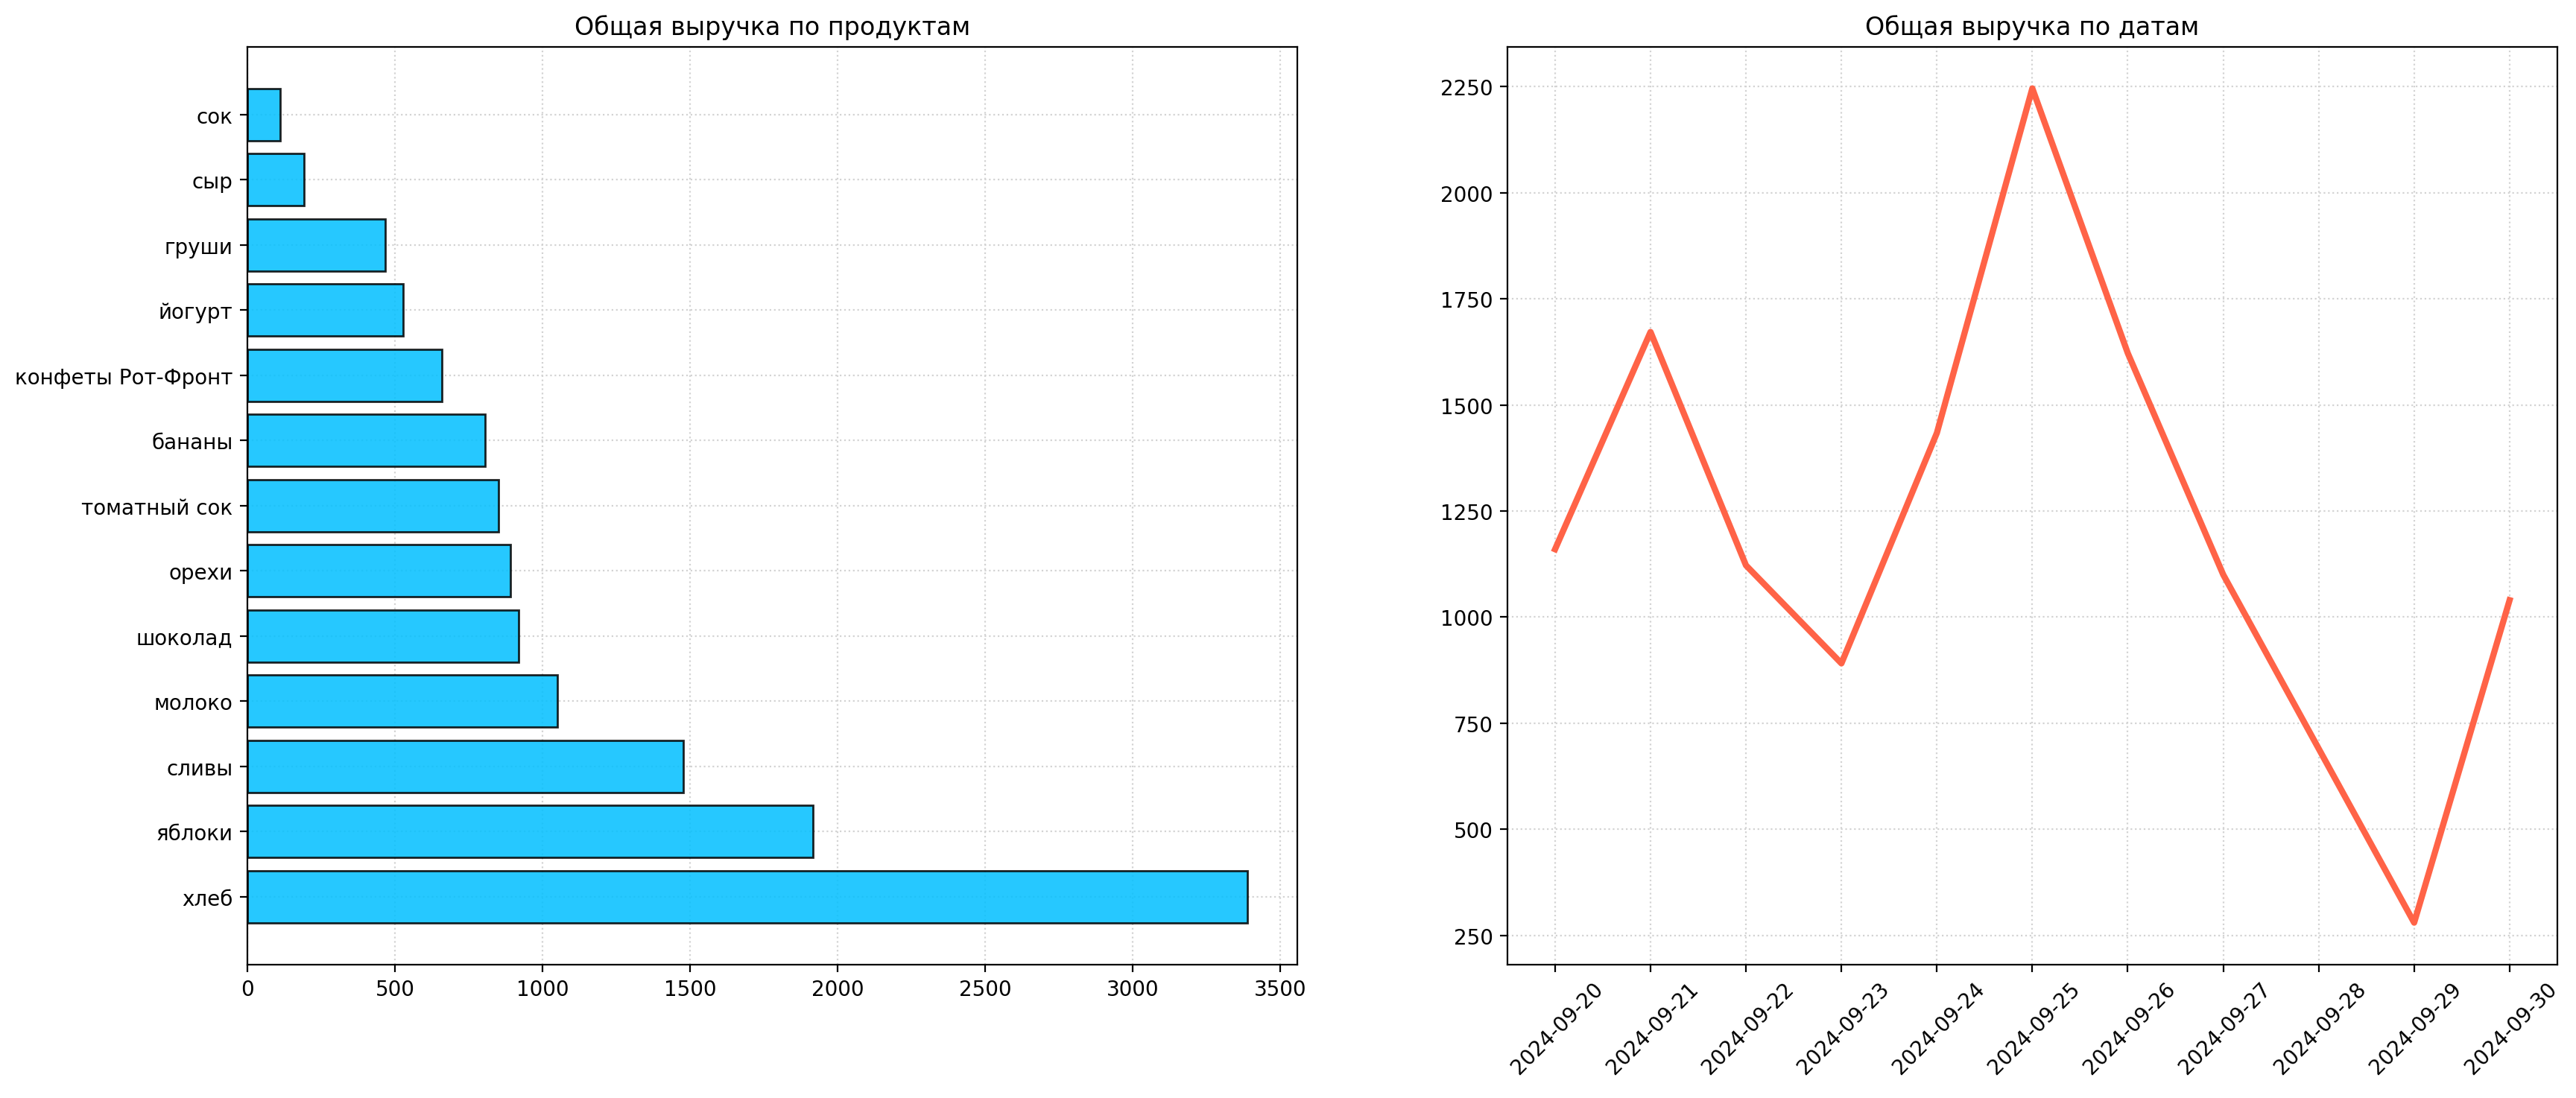

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

ax = axs[0]
products = dict(sorted(products.items(), key=lambda item: item[1], reverse=True))
ax.barh(products.keys(), products.values(), color='deepskyblue', edgecolor='black', alpha=0.85)
ax.grid(ls=':', color='lightgray')
ax.set_axisbelow(True)
ax.set_title('Общая выручка по продуктам')

ax = axs[1]
periods = dict(sorted(periods.items(), key=lambda item: item[0]))
ax.plot(periods.keys(), periods.values(), color='tomato', lw=3)
ax.set_xticks(range(0, len(periods.keys())))
ax.set_xticklabels(periods.keys(), rotation=45)
ax.grid(ls=':', color='lightgray')
ax.set_axisbelow(True)
ax.set_title('Общая выручка по датам');